In [1]:
%matplotlib inline

import json
import pandas as pd

from datetime import datetime

In [2]:
with open('events-sample.log') as f:
    data = [json.loads(line) for line in f]

len(data)

60

In [3]:
data[0]

{'id': '9dfd764a-de98-4692-bf5f-44597d45aeae',
 'name': 'Sign in page visited',
 'properties': {'event_properties': {},
  'host': 'localhost',
  'user_agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.98 Safari/537.36',
  'user_id': 'anonymous-uuid',
  'user_ip': '127.0.0.1'},
 'time': '2016-12-05T14:34:15.361Z',
 'visit_id': 'e0af98a1-af4b-40ec-9317-bc6dff3c796f',
 'visitor_id': '3691d6d7-1ba2-48fe-9bd3-3a66d01fee94'}

In [4]:
data[-1]

{'id': '5c6cb97e-d6ba-4e69-94c2-8b6c2220b3f5',
 'name': 'Multi-Factor Authentication: enter OTP visited',
 'properties': {'event_properties': {'confirmation_for_phone_change': False,
   'context': 'confirmation',
   'method': 'sms'},
  'host': 'localhost',
  'user_agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.98 Safari/537.36',
  'user_id': 'ffb8217e-a7d7-4e8f-95a0-18ebd6276226',
  'user_ip': '127.0.0.1'},
 'time': '2016-12-05T14:37:51.252Z',
 'visit_id': '9a527d60-4e62-42d8-883a-f3439e2aac01',
 'visitor_id': '1806ae63-6e96-4243-baff-e14b67f02474'}

In [5]:
# filter to events

events = [d for d in data if d.get('visit_id') is not None]

len(events)

60

In [6]:
for e in events[:3]:
    print('{}\n---'.format(e))

{'name': 'Sign in page visited', 'time': '2016-12-05T14:34:15.361Z', 'id': '9dfd764a-de98-4692-bf5f-44597d45aeae', 'visit_id': 'e0af98a1-af4b-40ec-9317-bc6dff3c796f', 'properties': {'user_ip': '127.0.0.1', 'host': 'localhost', 'event_properties': {}, 'user_agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.98 Safari/537.36', 'user_id': 'anonymous-uuid'}, 'visitor_id': '3691d6d7-1ba2-48fe-9bd3-3a66d01fee94'}
---
{'name': 'User Registration: intro visited', 'time': '2016-12-05T14:34:32.195Z', 'id': 'c5a827fb-f8d7-4415-90ba-13076db519c9', 'visit_id': '711a25fc-5963-48f3-a034-2f6d1afbf959', 'properties': {'user_ip': '127.0.0.1', 'host': 'localhost', 'event_properties': {}, 'user_agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.98 Safari/537.36', 'user_id': 'anonymous-uuid'}, 'visitor_id': '3691d6d7-1ba2-48fe-9bd3-3a66d01fee94'}
---
{'name': 'User Registration: enter

In [7]:
# create df

cols = [
    'time', 'id', 'visit_id', 'visitor_id',
    'name', 'properties'
]

df = pd.DataFrame(events, columns=cols)

df['epoch'] = df['time'].apply(
    lambda x: datetime.strptime(x.split(' +')[0], "%Y-%m-%dT%H:%M:%S.%fZ").timestamp()
)

for c in ['user_agent', 'user_id', 'user_ip', 'event_properties']:
    df[c] = df['properties'].apply(lambda x: x.get(c))

final_cols = [
    'epoch', 'time', 'id', 'visit_id', 'visitor_id',
    'user_agent', 'user_id', 'user_ip',
    'name', 'event_properties'
]

df = df[final_cols]

df.head()

,epoch,time,id,visit_id,visitor_id,user_agent,user_id,user_ip,name,event_properties
0,1.480966e+09,2016-12-05T14:34:15.361Z,9dfd764a-de98-4692-bf5f-44597d45aeae,e0af98a1-af4b-40ec-9317-bc6dff3c796f,3691d6d7-1ba2-48fe-9bd3-3a66d01fee94,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,anonymous-uuid,127.0.0.1,Sign in page visited,{}
1,1.480966e+09,2016-12-05T14:34:32.195Z,c5a827fb-f8d7-4415-90ba-13076db519c9,711a25fc-5963-48f3-a034-2f6d1afbf959,3691d6d7-1ba2-48fe-9bd3-3a66d01fee94,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,anonymous-uuid,127.0.0.1,User Registration: intro visited,{}
2,1.480966e+09,2016-12-05T14:34:35.022Z,1b6b47b2-27a3-4ce5-a0d2-14a1788843c1,711a25fc-5963-48f3-a034-2f6d1afbf959,3691d6d7-1ba2-48fe-9bd3-3a66d01fee94,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,anonymous-uuid,127.0.0.1,User Registration: enter email visited,{}
3,1.480966e+09,2016-12-05T14:34:49.724Z,78da6e4e-5241-4967-8e39-e725d1ddc8e9,711a25fc-5963-48f3-a034-2f6d1afbf959,3691d6d7-1ba2-48fe-9bd3-3a66d01fee94,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,12f78b17-a3da-40ff-941c-4c446fbf9570,127.0.0.1,User Registration: Email Submitted,"{'email_already_exists': False, 'errors': [], ..."
4,1.480966e+09,2016-12-05T14:34:53.335Z,e40f476c-608f-4686-95c7-3762bcfce7e4,711a25fc-5963-48f3-a034-2f6d1afbf959,3691d6d7-1ba2-48fe-9bd3-3a66d01fee94,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,anonymous-uuid,127.0.0.1,Sign in page visited,{}


In [8]:
df.iloc[0]

epoch                                                     1.48097e+09
time                                         2016-12-05T14:34:15.361Z
id                               9dfd764a-de98-4692-bf5f-44597d45aeae
visit_id                         e0af98a1-af4b-40ec-9317-bc6dff3c796f
visitor_id                       3691d6d7-1ba2-48fe-9bd3-3a66d01fee94
user_agent          Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...
user_id                                                anonymous-uuid
user_ip                                                     127.0.0.1
name                                             Sign in page visited
event_properties                                                   {}
Name: 0, dtype: object

Sign in page visited                              13
User Registration: intro visited                   5
Email and Password Authentication                  5
User Registration: enter email visited             5
Multi-Factor Authentication: enter OTP visited     5
OTP: Delivery Selection                            5
User Registration: Email Submitted                 4
Multi-Factor Authentication                        4
Password Creation                                  3
2FA setup: valid phone number                      3
Email Confirmation                                 3
User Registration: phone setup visited             3
User Registration: recovery code visited           2
Name: name, dtype: int64

Axes(0.125,0.125;0.775x0.775)


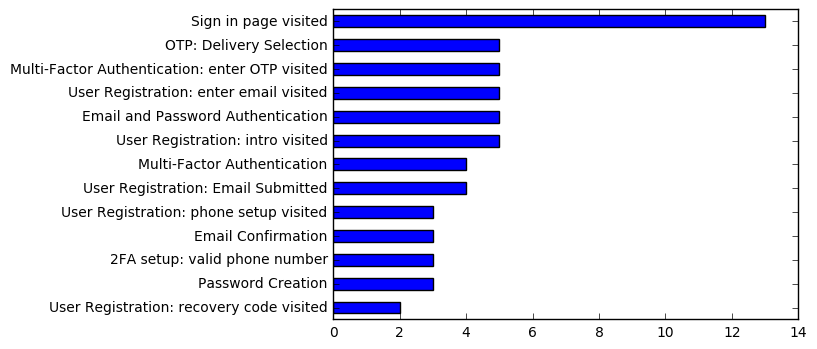

In [9]:
# counts by event

event_cts = df['name'].value_counts()

print(event_cts)
print()
print(event_cts.sort_values().plot(kind='barh'))

In [10]:
# login success / fail

df[df.name == 'Email and Password Authentication'].head()

,epoch,time,id,visit_id,visitor_id,user_agent,user_id,user_ip,name,event_properties
30,1.480967e+09,2016-12-05T14:36:32.912Z,455102a2-bc5f-4ab9-9d9d-c60b4d0132fd,bbd663db-3174-4e7d-b711-88e81d8c8ef8,f7dc9649-81d6-4a8f-9d33-919d05f8c7d8,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,12f78b17-a3da-40ff-941c-4c446fbf9570,127.0.0.1,Email and Password Authentication,"{'success?': True, 'user_locked_out': False}"
32,1.480967e+09,2016-12-05T14:36:47.042Z,3517868e-3a09-4bde-a5e4-138bff0d2312,d1ff1255-1db0-4fb5-990b-45136d880077,f325a3ac-8144-42b7-82d7-36dd462729f6,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,12f78b17-a3da-40ff-941c-4c446fbf9570,127.0.0.1,Email and Password Authentication,"{'success?': True, 'user_locked_out': False}"
37,1.480967e+09,2016-12-05T14:36:56.707Z,399fcf53-2219-4f64-b37f-5308597265e3,26c9ad60-dcb2-4439-a6cf-e9eb6a80d574,66f58390-c0e4-4bf1-a31d-2779d0ce54fd,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,12f78b17-a3da-40ff-941c-4c446fbf9570,127.0.0.1,Email and Password Authentication,"{'success?': False, 'user_locked_out': False}"
40,1.480967e+09,2016-12-05T14:37:04.739Z,708a0892-3d18-48cd-8b33-10edf73c5457,93183719-23c7-4563-8293-9b908d1e70cb,3abc64b8-7419-4b14-a727-3bb514996a5b,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,12f78b17-a3da-40ff-941c-4c446fbf9570,127.0.0.1,Email and Password Authentication,"{'success?': False, 'user_locked_out': False}"
42,1.480967e+09,2016-12-05T14:37:09.656Z,594abb81-5dc0-4c9c-8a9e-26cc012a3537,93183719-23c7-4563-8293-9b908d1e70cb,3abc64b8-7419-4b14-a727-3bb514996a5b,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,12f78b17-a3da-40ff-941c-4c446fbf9570,127.0.0.1,Email and Password Authentication,"{'success?': True, 'user_locked_out': False}"


In [11]:
GROUP_KEY = 'visitor_id'
TIME_FIELD = 'epoch'
EVENT_FIELD = 'name'
FUNNEL_STEPS = [
    'User Registration: intro visited',
    'User Registration: enter email visited',
    'Password Creation',
    'User Registration: phone setup visited',
    'Multi-Factor Authentication',
]

def funnelize(group, funnel_steps):
    curr = 0
    funnel_cts = [0 for s in funnel_steps]

    for i, row in group.iterrows():
        evt = row[EVENT_FIELD]
        if evt in funnel_steps:
            idx = funnel_steps.index(evt)
            if idx <= curr + 1:
                funnel_cts[idx] += 1
                curr = idx
        
    return funnel_cts

# sort event dataset by time
df.sort_values(by=TIME_FIELD, ascending=True, inplace=True)

# step through events by group_key (i.e., browser, visit), 
# and increment event counts by funnel step if prior funnel steps occurred
funnel_cts = df.groupby(GROUP_KEY).apply(funnelize, FUNNEL_STEPS)

# format results as a dataframe
funnel = pd.DataFrame(list(funnel_cts.values), index=funnel_cts.index, columns=FUNNEL_STEPS)

print(funnel[FUNNEL_STEPS].sum())

User Registration: intro visited          5
User Registration: enter email visited    5
Password Creation                         3
User Registration: phone setup visited    3
Multi-Factor Authentication               2
dtype: int64


In [12]:
# funnel summary, deduped across group key 
# (i.e., event occurrences become 1/0 indicators instead of counts)

funnel_norm = funnel.copy()
funnel_norm[funnel_norm != 0] = 1
print(funnel_norm[FUNNEL_STEPS].sum())

User Registration: intro visited          5
User Registration: enter email visited    5
Password Creation                         3
User Registration: phone setup visited    3
Multi-Factor Authentication               2
dtype: int64


In [13]:
# full completion rate

print(float(funnel_norm[FUNNEL_STEPS[-1]].sum()) / funnel_norm[FUNNEL_STEPS[0]].sum())

0.4
